Q1.  Train a Perceptron is a fundamental building block for neural  networks. Let  us  try  to train  a  single perceptron. Consider the data given in the following table. As onecan see, it has two attributes x1,x2 and a class label (either 0 or 1).1.  Implement the perceptron training rule  and  get  the  appropriate parameters fora single perceptron.2. Implement Delta rule / Widrow-Hoff batch update rule.3. Compare the results obtained through the two rules.4. Plot the data points  and  the  obtained  decision  boundary.5.  Also  draw  the  schematic  diagram  of  the trained perceptron with learnedweights.

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
X = np.array([[2,3],[4,5],[11,11],[4,11],[12,5],[5,2],[6,1],[6,3],[2,10],[4,7],[13,8],[1,6],[6,9],[10,12],[8,3],[2,8]])
X

array([[ 2,  3],
       [ 4,  5],
       [11, 11],
       [ 4, 11],
       [12,  5],
       [ 5,  2],
       [ 6,  1],
       [ 6,  3],
       [ 2, 10],
       [ 4,  7],
       [13,  8],
       [ 1,  6],
       [ 6,  9],
       [10, 12],
       [ 8,  3],
       [ 2,  8]])

In [80]:
# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[ 2  4 11  4 12  5  6  6  2  4 13  1  6 10  8  2]
 [ 3  5 11 11  5  2  1  3 10  7  8  6  9 12  3  8]]

 Shape of Input Matrix: (2, 16)


In [328]:
y = np.array([[0],[0],[1],[1],[0],[0],[0],[0],[1],[1],[0],[1],[1],[1],[0],[1]])
# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)
# shape of input matrix
print('\n Shape of output Matrix:', y.shape)


 Output in matrix form:
[[0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1]]

 Shape of output Matrix: (1, 16)


In [82]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

In [83]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))


# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [84]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((2, 3), (3, 1))

In [85]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [86]:
hidden_layer_input=np.dot(w_ih.T,X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

In [87]:
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
perceptron_output = sigmoid(output_layer_input)

In [88]:
#1. Implement the perceptron training rule and get the appropriate parameters fora single perceptron
perceptron_output

array([[0.76484841, 0.78378738, 0.78706236, 0.78482869, 0.78697685,
        0.7816226 , 0.78063057, 0.7849362 , 0.77227088, 0.78453617,
        0.78705717, 0.75116476, 0.78671399, 0.78705933, 0.78603417,
        0.77198051]])

In [137]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 2 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000

In [138]:
# initial w_ih and w_ho
w_ih

array([[0.50805823, 0.97580729],
       [0.6974696 , 0.00611894]])

In [139]:
w_ho

array([[0.53834031],
       [0.74620236]])

In [361]:
class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.inputlayer_neurons = no_of_inputs # number of features in data set
        hiddenlayer_neurons = 2 # number of hidden layers neurons
        output_neurons = 1 # number of neurons at output layer
        self.learning_rate = learning_rate
        self.epochs = threshold
        #self.weights = np.zeros(no_of_inputs + 1)#including bias
        
    def predict(self, row):
        activation = self.weights[0]
        for i in range(len(row)-1):
            activation += self.weights[i + 1] * row[i]
        return 1.0 if activation >= 0.0 else 0.0
    
    def predictSingle(self, row):
        summation = np.dot(row, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self,train, l_rate, n_epoch = 100):
        self.weights = [0.0 for i in range(len(train[0])+1)]
        for epoch in range(n_epoch):
            sum_error = 0.0
            for row in train:
                prediction = self.predictSingle(row)
                error = row[-1] - prediction
                sum_error += error**2
                self.weights[0] = self.weights[0] + l_rate * error
                for i in range(len(row)-1):
                    self.weights[i + 1] = self.weights[i + 1] + l_rate * error * row[i]
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        return weights

In [362]:
ppn = Perceptron(2)
ppn.train(X,y[0])
ppn.predict(np.array([0,10]))

ValueError: setting an array element with a sequence.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

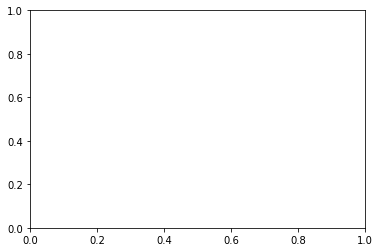

In [337]:
ppn = Perceptron(2)
ppn.train(X,y[0])
ppn.predict(np.array([0,10]))
# Plotting decision regions
plot_decision_regions(X, y[0], clf = ppn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [311]:
# updated w_ih and w_ho
w_ih

array([[-0.2829319 ,  0.27839399],
       [ 0.42029216, -0.41633145]])

In [142]:
#2. Implement Delta rule / Widrow-Hoff batch update rule
output

array([[0.35917734, 0.49762149, 0.7151495 , 0.91594153, 0.00700751,
        0.02786812, 0.0071034 , 0.03787358, 0.91881483, 0.78565898,
        0.05078292, 0.84921985, 0.83134832, 0.84785761, 0.01164908,
        0.89199975]])

In [143]:
# error at last epoch
error

array([[6.45041795e-02, 1.23813574e-01, 4.05699025e-02, 3.53291341e-03,
        2.45526303e-05, 3.88316132e-04, 2.52291473e-05, 7.17204033e-04,
        3.29551607e-03, 2.29710368e-02, 1.28945272e-03, 1.13673271e-02,
        1.42216942e-02, 1.15736533e-02, 6.78505620e-05, 5.83202719e-03]])

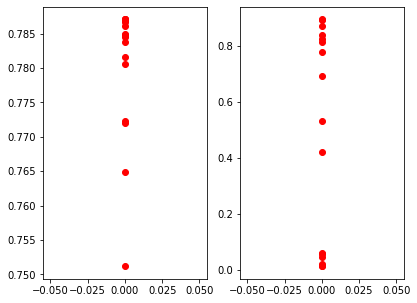

In [99]:
#3. Compare the results obtained through the two rules.
t = y
A = perceptron_output
B = output
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.plot(A,'ro')
plt.subplot(132)
plt.plot(B,'ro')
plt.show()

In [225]:
import pandas as pd
df = pd.DataFrame(data=X.T)
target = y[0]

In [320]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    c0 = c1 = 0 # Counter of label 0 and label 1 instances
    for i in range(y.shape[1]):
        if y[0][i] == 0:
            c0 = c0 + 1
        else:
            c1 = c1 + 1
    x0 = np.ones((c0,2)) # matrix label 0 instances
    x1 = np.ones((c1,2)) # matrix label 1 instances
    
    k0 = k1 = 0
    
    for i in range(0,y.shape[1]):
        if y[0][i] == 0:
            x0[k0] = df[0][i]
            k0 = k0 + 1
        else:
            x1[k1] = df[1][i]
            k1 = k1 + 1
    X_line = [x0, x1]
    print(X)
    colors = ["green", "blue"] # colours for Scatter Plot
    # getting the x co-ordinates of the decision boundary
    plot_x = np.array([np.min(df[0]) - 2, np.max(df[0]) + 2])
    # getting corresponding y co-ordinates of the decision boundary

    #y_line = np.dot(w_ih.T,X)
    y_line = pd.DataFrame((np.dot(w_ih.T,X)).T)
    
    for i in range(y_line.shape[0]):
        #y =mx+c, m is slope and c is intercept
        line = y_line[0][i], y_line[1][i]
        line = np.asarray(line)
        print(line)
        plt.plot(X[0][i], X[1][i],'ro')
        plt.plot(y_line[0][i] + 5,y_line[1][i] + 5,'ko')

[[ 2  4 11  4 12  5  6  6  2  4 13  1  6 10  8  2]
 [ 3  5 11 11  5  2  1  3 10  7  8  6  9 12  3  8]]
[ 0.69501268 -0.69220637]
[ 0.96973321 -0.96808129]
[ 1.51096287 -1.51731205]
[ 3.49148619 -3.46606999]
[-1.29372202  1.25907064]
[-0.57407519  0.55930705]
[-1.27729926  1.2540325 ]
[-0.43671493  0.4213696 ]
[ 3.63705783 -3.60652652]
[ 1.81031753 -1.80074419]
[-0.31577743  0.28847028]
[ 2.23882108 -2.21959471]
[ 2.08503805 -2.07661911]
[ 2.21418693 -2.21203749]
[-1.00257874  0.97815758]
[ 2.7964735  -2.77386362]


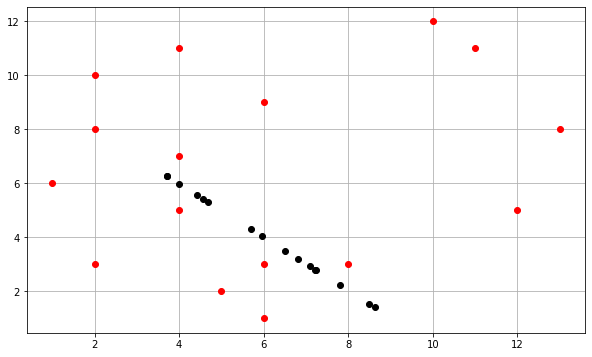

In [321]:
plot_data(X,y,w_ih)

In [306]:
for i in range(y_line.shape[0]):
    print(X[0][i], X[1][i]) 

2 3
4 5
11 11
4 11
12 5
5 2
6 1
6 3
2 10
4 7
13 8
1 6
6 9
10 12
8 3
2 8


In [278]:
y_line = pd.DataFrame((np.dot(w_ih.T,X)).T)
np.array(y_line.iloc[[0]]).shape

(1, 2)

In [267]:
line = np.array([y_line[0][0], y_line[1][0]])
#line = np.asarray(line)
print(line.shape)

(2,)


In [218]:
from mlxtend.plotting import plot_decision_regions

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

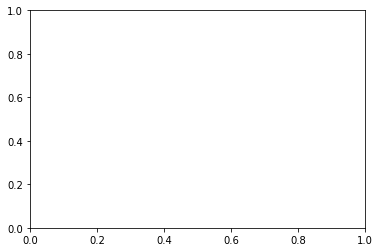

In [229]:
# Plotting decision regions
plot_decision_regions(X.T, target, clf = output, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [227]:
output

array([[0.35917734, 0.49762149, 0.7151495 , 0.91594153, 0.00700751,
        0.02786812, 0.0071034 , 0.03787358, 0.91881483, 0.78565898,
        0.05078292, 0.84921985, 0.83134832, 0.84785761, 0.01164908,
        0.89199975]])

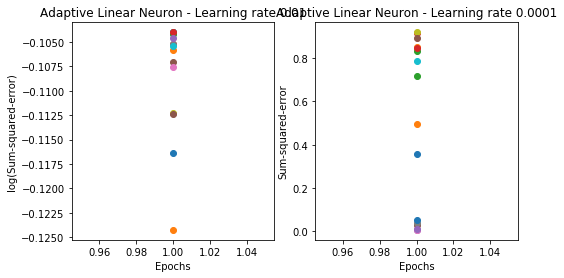

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].plot(range(1, len(perceptron_output) + 1), np.log10(perceptron_output), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaptive Linear Neuron - Learning rate 0.01')

ax[1].plot(range(1, len(output) + 1), output, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaptive Linear Neuron - Learning rate 0.0001')
plt.show()

In [360]:
for i in range(2):
    print(i)

0
1
